# Amazon Alexa Echo Reviews Sentiment Analysis

## Step #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

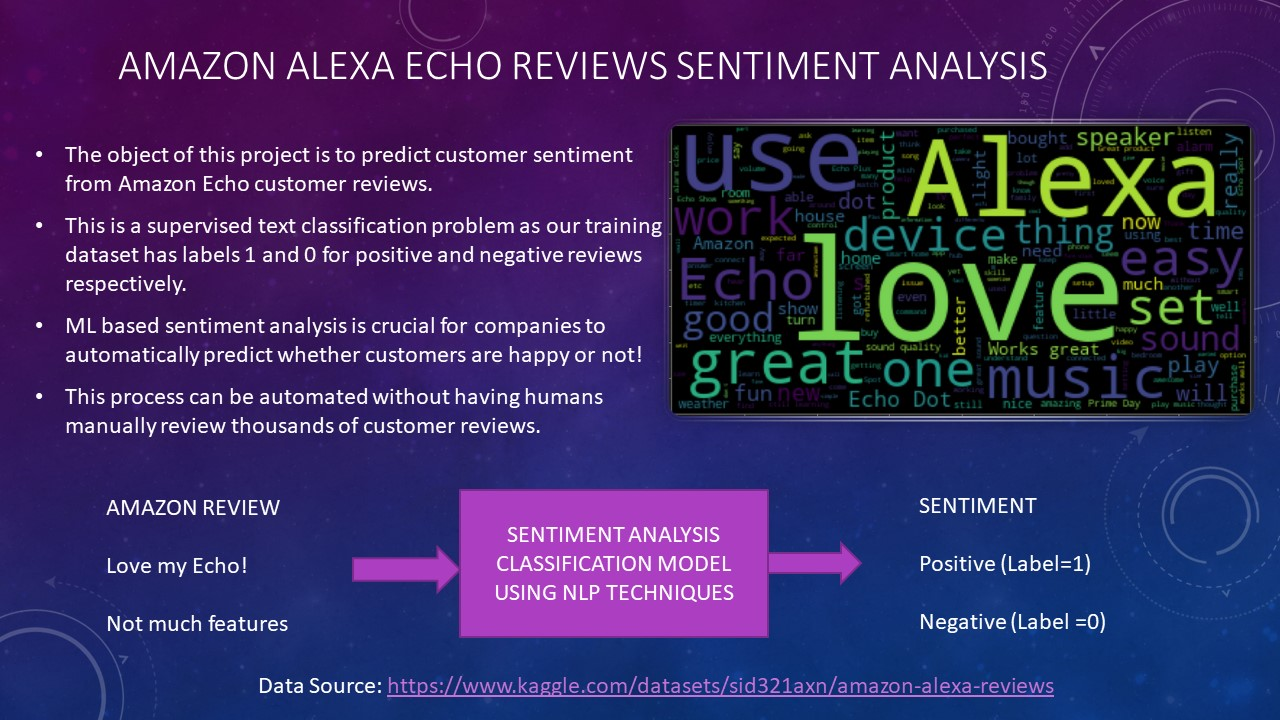

Data Source: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews
        

## Step #2: IMPORT LIBRARIES AND DATASETS

In [42]:
#conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rutuj\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39hb82d6ee_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py39hb82d6ee_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py39haa95532_0 --> conda-forge::conda-4.12.0-py39hcbf5309_0




pyth



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

#!pip install wordcloud
from wordcloud import WordCloud

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it can be hard to see them. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Load the data
reviews_df=pd.read_csv('Amazon_reviews.csv') 
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [11]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


 
- **Drop the 'date' column from the DataFrame as we don't need it** 


In [12]:
reviews_df.drop(['date'],axis=1, inplace=True)
reviews_df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


- **Check for Missing Values**

In [13]:
reviews_df.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## Step #3: PERFORM DATA VISUALIZATION

<AxesSubplot:>

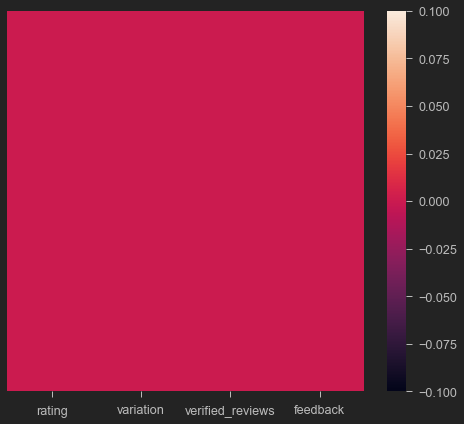

In [15]:
#To check null values
sns.heatmap(reviews_df.isnull(),yticklabels=False)

<AxesSubplot:xlabel='rating', ylabel='count'>

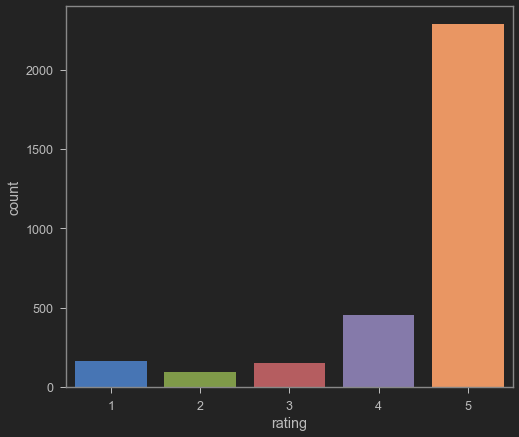

In [16]:
# Plot the count plot for the ratings
sns.countplot(x=reviews_df['rating'])


- **Plot the countplot for the feedback column to check roughly how many positive and negative feedback are present in the dataset?**

<AxesSubplot:xlabel='feedback', ylabel='count'>

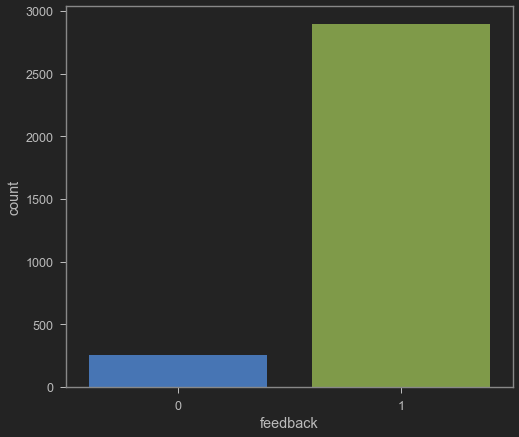

In [18]:
sns.countplot(x=reviews_df['feedback'])

## Step #4: PERFORM DATA EXPLORATION

In [19]:
# Let's get the length of the verified_reviews column
#To apply a function to the dataframe, take that column, apply(), inside this pass the function

reviews_df['length']=reviews_df['verified_reviews'].apply(len)


<AxesSubplot:ylabel='Frequency'>

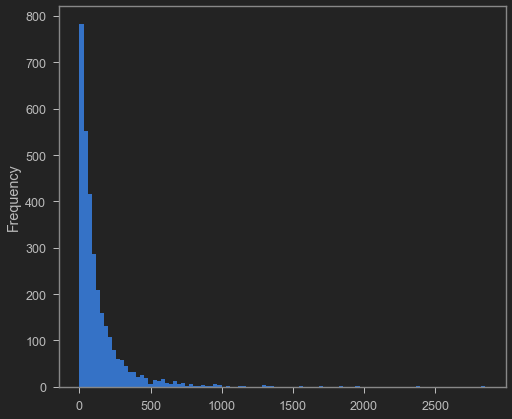

In [20]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [21]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


- **View the message with the longest length**

In [22]:
# Let's see the longest message 
reviews_df[reviews_df['length']==2851.000000]

,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [23]:
reviews_df[reviews_df['length']==2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi



- **View the message with the average length**

In [24]:
reviews_df[reviews_df['length']==int(np.mean(reviews_df['length']))]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [25]:
np.mean(reviews_df['length'])

132.0495238095238

# TASK #5: PLOT THE WORDCLOUD

In [26]:
# Obtain only the positive reviews
positive_reviews=reviews_df[ reviews_df['feedback']==1 ]
positive_reviews.head()

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5


In [28]:
# Obtain the negative reviews only
negative_reviews=reviews_df[reviews_df['feedback']==0]
negative_reviews.head()

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20


- **Plot the wordcloud of the "positive" dataframe** 

In [29]:
# Convert to list format
sentences=positive_reviews['verified_reviews'].tolist()
len(sentences)
#sentences
#type(positive_reviews['verified_reviews'])

2893

In [30]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [32]:
# Join all reviews into one large string based on spaces
sentences_as_one_string=' '.join(sentences)

In [33]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

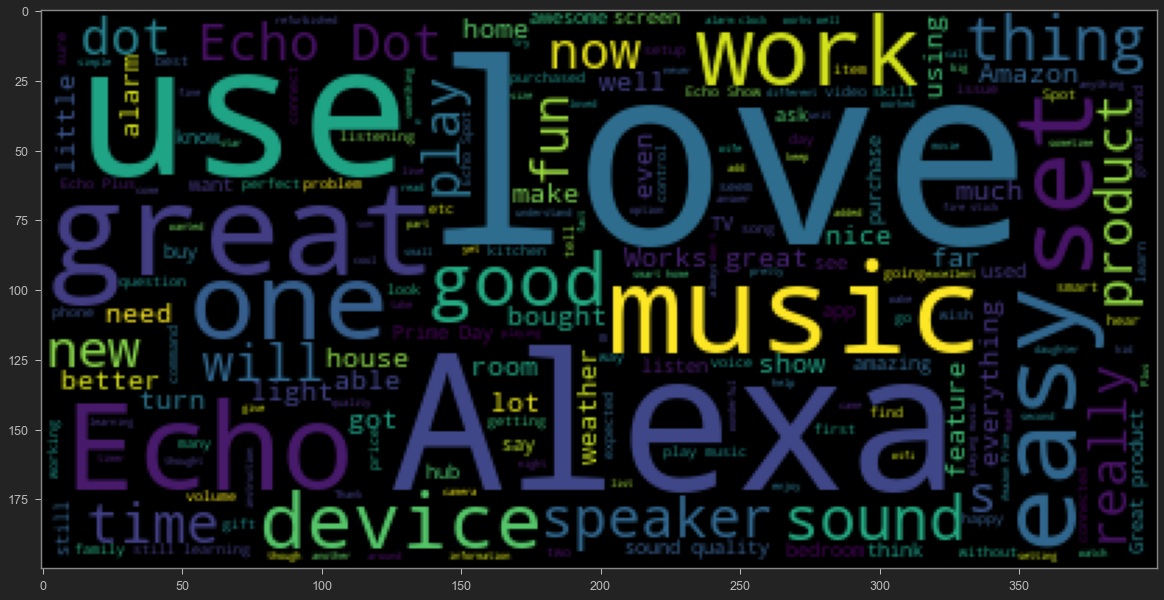

In [45]:
#WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

- **Plot the wordcloud of the "negative" dataframe** 

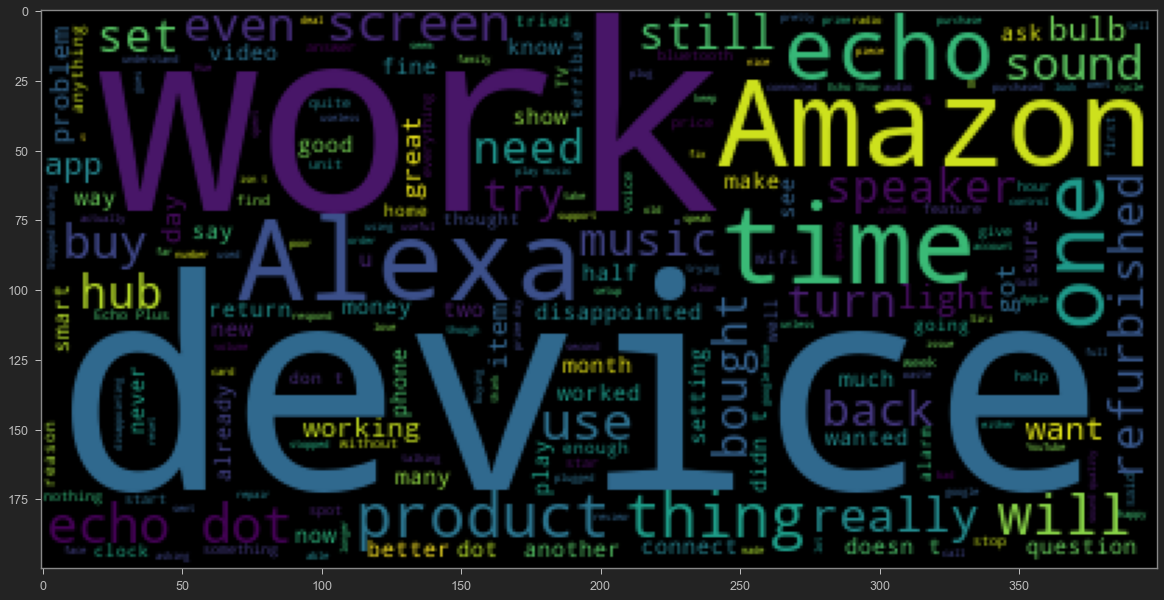

In [33]:
sentences=negative_reviews['verified_reviews'].tolist()
len(sentences)
single_sentence=' '.join(sentences)
single_sentence
#from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_sentence))

## Step #6: TEXT DATA CLEANING 

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
#Stopwords in English
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### UNDERSTANDING COUNT VECTORIZATION (TOKENIZATION)

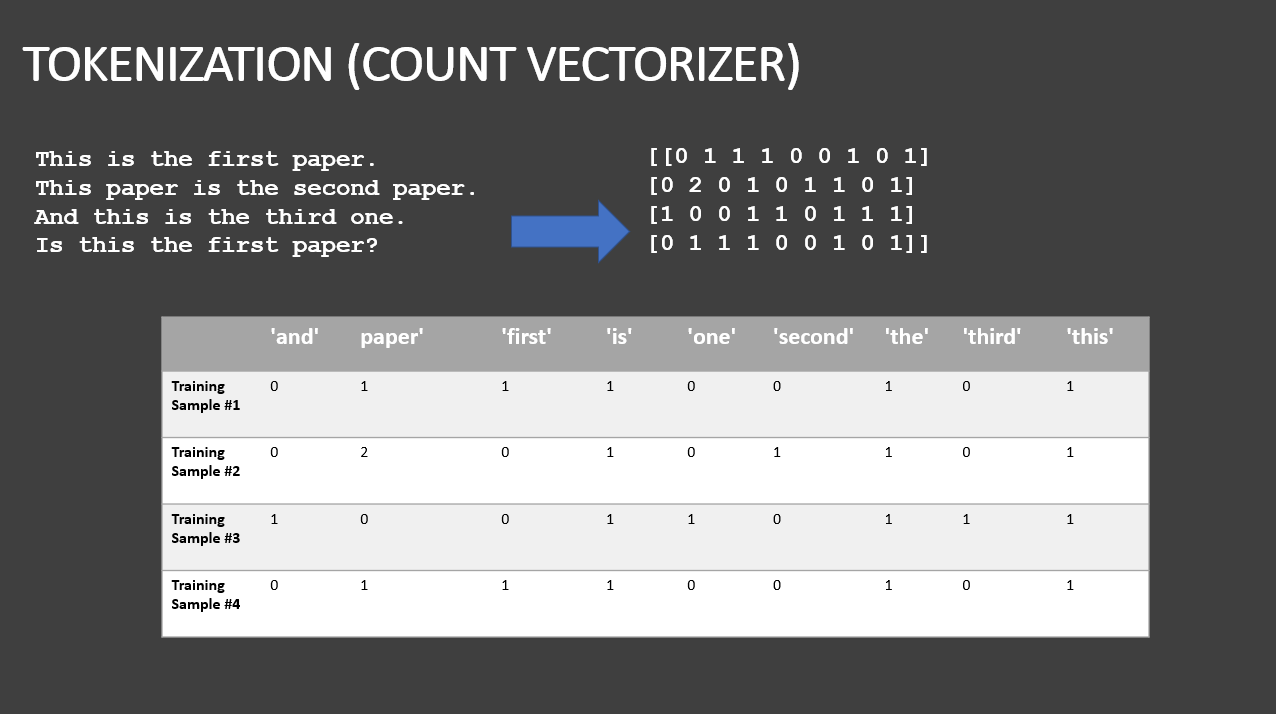

#### CountVectorizer is used to transform text into a given vector based on frequency (count) of each word that occurs in the entire text


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this paper the first paper?']
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [77]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [78]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 2 0 1 0 1]]


## Step #7: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [82]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    #Step 1: Remove Punctuation Marks
    Test_punc_removed=[ char for char in message if char not in string.punctuation ]
    Test_punc_removed=''.join(Test_punc_removed)
    #Step 2: Remove Stop Words
    Test_removed_join_clean = [word for word in Test_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return Test_removed_join_clean

In [83]:
reviews_df_clean=reviews_df['verified_reviews'].apply(message_cleaning)

In [84]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [85]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [86]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [89]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning) #Before applying vectorization, I'm applying analyzer=message_cleaning: user defined
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [61]:
#All different unique words in  
print(vectorizer.get_feature_names()) 

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [91]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [90]:
reviews_countvectorizer.shape

(3150, 5211)

In [92]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [93]:
X = reviews

In [94]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


- **Checking shape of X and Y**

In [96]:
X.shape

(3150, 5211)

In [98]:
y.shape

(3150,)

## Step #8: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

- **Train a NaiveBayes classifier and assess its performance**

Bernoulli Naive bayes is good at handling boolean/binary attributes,while Multinomial Naive bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values. Hence I'm using Multinomial Naive Bayes

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)
#Train out model

MultinomialNB()

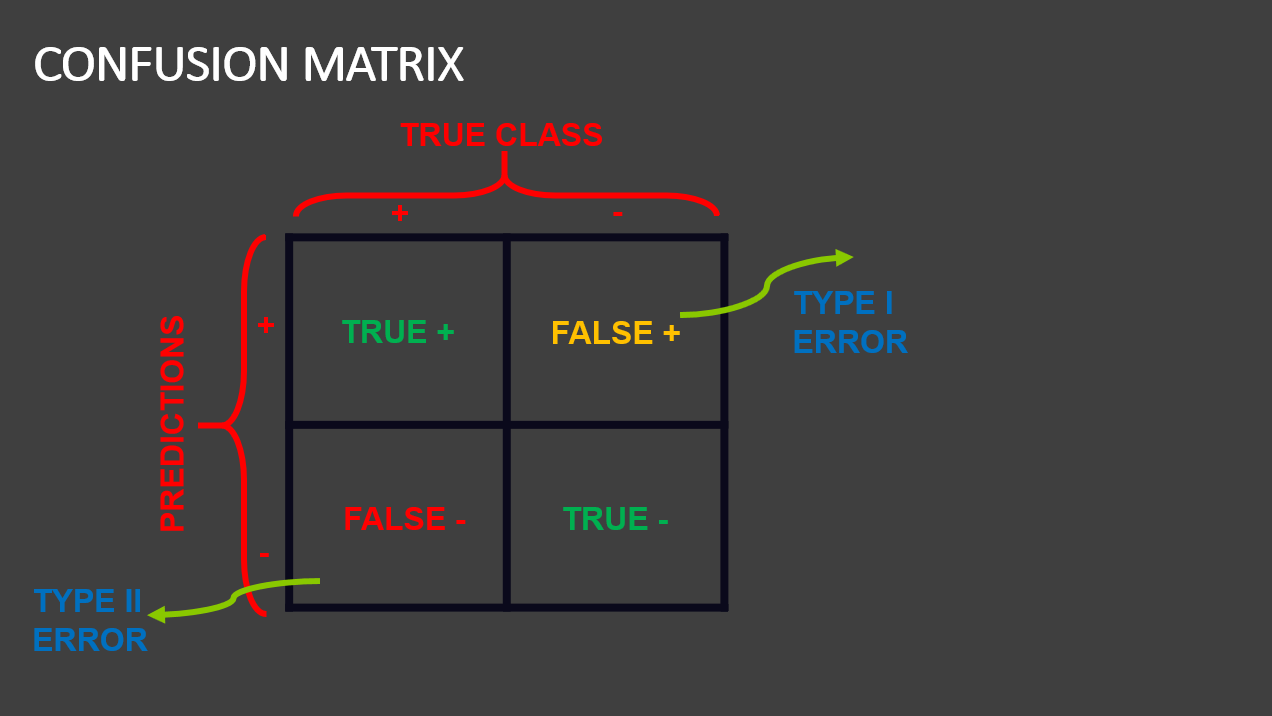

<AxesSubplot:>

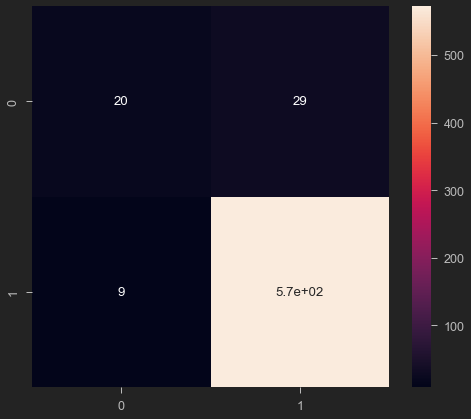

In [119]:
# Predicting the Test set results
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [120]:
print(classification_report(y_test,y_predict_test)

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        49
           1       0.95      0.98      0.97       581

    accuracy                           0.94       630
   macro avg       0.82      0.70      0.74       630
weighted avg       0.93      0.94      0.93       630



- **It is observed that although accuracy of Naive Bayes Classifier and Logistic Regression is approximately equal,  Precision, Recall, F1-score of Naive Bayes Classifier Model is slightly higher.**

In this problem, our class of interest is 1 and predicting a negative review (0) as positive will cost us high error. i.e. we should reduce type 1 error as much as possible and type 1 error is less in Naive Bayes classifier. So Naive Bayes Classifier is a better Model.

- **Train a Logistic Regression classifier and assess its performance**

In [131]:
LR_classifier=LogisticRegression()
LR_classifier.fit(X_train,y_train)
y_predict_LR=LR_classifier.predict(X_test)

<AxesSubplot:>

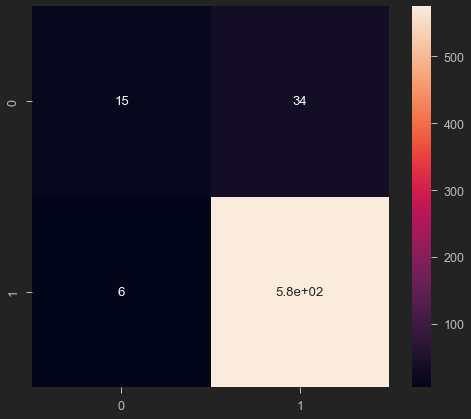

In [132]:
cm=confusion_matrix(y_test,y_predict_LR)
sns.heatmap(cm,annot=True)

In [123]:
print(classification_report(y_test, y_predict_LR))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        49
           1       0.94      0.99      0.97       581

    accuracy                           0.94       630
   macro avg       0.83      0.65      0.70       630
weighted avg       0.93      0.94      0.92       630



# Practice

In [46]:
Test = '$I Love Coursera &Rhyme Guided Projects...!!!!'

In [50]:
Test_punc_removed=[char for char in Test if char not in string.punctuation]
type(Test_punc_removed)
Test_punc_removed

['I',
 ' ',
 'L',
 'o',
 'v',
 'e',
 ' ',
 'C',
 'o',
 'u',
 'r',
 's',
 'e',
 'r',
 'a',
 ' ',
 'R',
 'h',
 'y',
 'm',
 'e',
 ' ',
 'G',
 'u',
 'i',
 'd',
 'e',
 'd',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's']

In [52]:

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join
#type(Test_punc_removed_join)#str

'I Love Coursera Rhyme Guided Projects'

In [55]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'
Test_punc_removed_join.split()

['I',
 'have',
 'been',
 'enjoying',
 'these',
 'coding,',
 'programming',
 'and',
 'AI',
 'guided',
 'Projects',
 'on',
 'Rhyme',
 'and',
 'Coursera']

In [59]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
#type(Test_punc_removed_join.split()) #list
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

In [60]:
Test_punc_removed_join.split()
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

**MINI CHALLENGE :** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [63]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'
def clean_text(text_data):
    remove_punctuation=[char for char in text_data if char not in string.punctuation] #removing punctuation, o/p is list of characters
    punctuation_free=''.join(remove_punctuation) #converted characters back to string
    #Now we have to remove stopwords
    #convert str into list of words:
    words=punctuation_free.split() #['here','is','a','word',.....]
    text=[word for word in words if word.lower() not in stopwords.words('english')]
    return(text)
    

**MINI CHALLENGE :**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
def vectorize_text(text_data):
    vectorizer=CountVectorizer()
    X=vectorizer.fit_transform(text_data) #Takes care of lower case and upper case letters
    features=vectorizer.get_feature_names()
    return X.toarray(),features


In [81]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
X,features=vectorize_text(mini_challenge)
print(X)
print(features)

[[1 1]
 [2 1]
 [1 3]]
['hello', 'world']


# MINI CHALLENGE SOLUTIONS

**MINI CHALLENGE #1 SOLUTION:** 
- **Drop the 'date' column from the DataFrame** 
- **Ensure that the column has been succesfully dropped** 

In [50]:
# Drop the 'id' column
reviews_df = reviews_df.drop(['date'], axis = 1)

In [51]:
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


**MINI CHALLENGE #2 SOLUTION:** 
- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

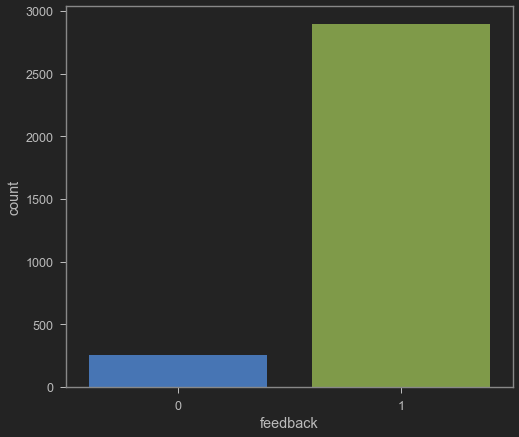

In [52]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

**MINI CHALLENGE #3 SOLUTION:**
- **View the message with the average length**

In [53]:
# Let's see the message with mean length 
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

**MINI CHALLENGE #4 SOLUTION:** 
- **Plot the wordcloud of the "negative" dataframe** 
- **What do you notice? Does the data make sense?**

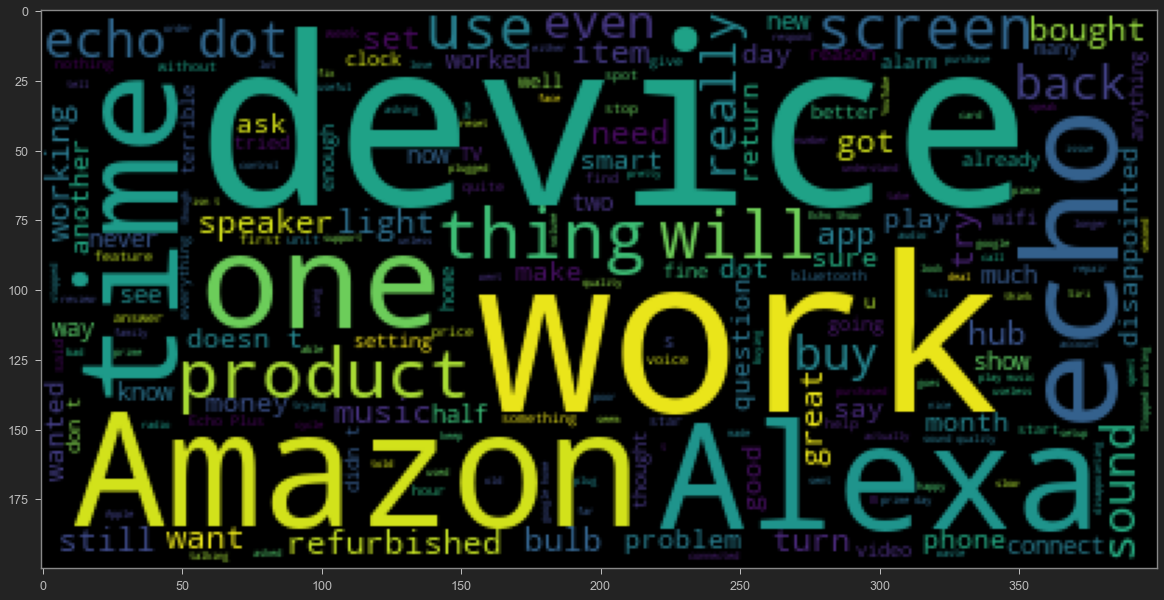

In [54]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**MINI CHALLENGE #5 SOLUTION:** 
- **For the following text, create a pipeline to remove punctuations followed by removing stopwords and test the pipeline**
- **mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'**

In [55]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations from text..!!'
challege = [ char for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations', 'text']

**MINI CHALLENGE #6 SOLUTION:**
- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- **Confirm your answer with code**

In [56]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())



[[1 1]
 [3 2]
 [2 4]]


**MINI CHALLENGE #7 SOLUTION:**
- **What is the shape of X and Y**

In [57]:
X.shape

(3150, 5211)

In [58]:
y.shape

(3150,)

**MINI CHALLENGE #8 SOLUTION:**
- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

           0       0.88      0.23      0.36        62
           1       0.92      1.00      0.96       568

    accuracy                           0.92       630
   macro avg       0.90      0.61      0.66       630
weighted avg       0.92      0.92      0.90       630



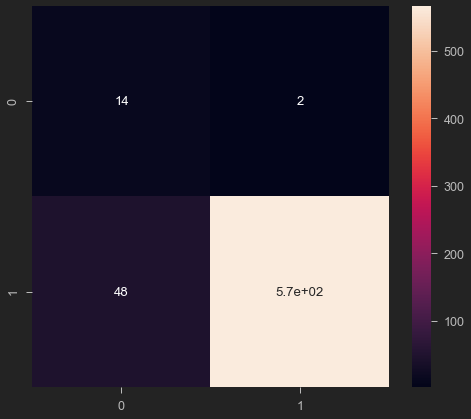

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Excellent Job!